In [1]:
# %load init_ipynb
import os
import matplotlib.pyplot as pl

assert os.environ["CONDA_DEFAULT_ENV"] == 'wakai'

plotpar = {'axes.labelsize': 16,
           'font.size': 16,
           'legend.fontsize': 16,
           'xtick.labelsize': 16,
           'ytick.labelsize': 16,
           'text.usetex': False}
pl.rcParams.update(plotpar)

In [2]:
#!{sys.executable} -m pip install --upgrade latex

In [3]:
import sys

try: 
    import isochrones
except:
    !{sys.executable} -m pip install --upgrade isochrones
    import isochrones

assert isochrones.__version__ == "2.1"

Holoviews not imported. Some visualizations will not be available.
PyMultiNest not imported.  MultiNest fits will not work.


In [4]:
# See page 5 in http://waps.cfa.harvard.edu/MIST/README_tables.pdf

eep_dict = {
    1: 'pre-main sequence (PMS)',
    202: 'zero age main sequence (ZAMS)',
    353: 'intermediate age main sequence (IAMS )',
    454: 'terminal age main sequence (TAMS)',
    605: 'tip of the red giant branch (RGBTip)',
    631: 'zero age core helium burning (ZACHeB)',
    707: 'terminal age core helium burning (TACHeB)'
}

In [5]:
from isochrones.mist import MISTIsochroneGrid


iso_grid = MISTIsochroneGrid()
iso_grid.df.head()

eep  age       feh      mass  initial_mass  \
log10_isochrone_age_yr feh  EEP                                               
5.0                    -4.0 35    35  5.0 -3.978406  0.100000      0.100000   
                            36    36  5.0 -3.978406  0.102885      0.102885   
                            37    37  5.0 -3.978406  0.107147      0.107147   
                            38    38  5.0 -3.978406  0.111379      0.111379   
                            39    39  5.0 -3.978406  0.115581      0.115581   

                                   radius   density   logTeff         Teff  \
log10_isochrone_age_yr feh  EEP                                              
5.0                    -4.0 35   1.106082  0.104181  3.617011  4140.105252   
                            36   1.122675  0.102504  3.618039  4149.909661   
                            37   1.147702  0.099918  3.619556  4164.436984   
                            38   1.173015  0.097284  3.621062  4178.903372   
                            39   1.198615  0.094623  3.622555  4193.289262   

                                     logg      logL      Mbol   delta_nu  \
log10_isochrone_age_yr feh  EEP                                            
5.0                    -4.0 35   3.350571 -0.489734  5.964335  37.987066   
                            36   3.347798 -0.472691  5.921728  37.739176   
                            37   3.343658 -0.447471  5.858678  37.345115   
                            38   3.339612 -0.422498  5.796244  36.923615   
                            39   3.335660 -0.397776  5.734440  36.473151   

                                     nu_max  phase   dm_deep  
log10_isochrone_age_yr feh  EEP                               
5.0                    -4.0 35   299.346079   -1.0  0.002885  
                            36   298.570836   -1.0  0.003573  
                            37   297.180748   -1.0  0.004247  
                            38   295.526946   -1.0  0.004217  
                            39   293.589960   -1.0  0.004189

In [6]:
#get unique indices

iso_grid_indices = {}
for i in range(3):
    index = iso_grid.df.index.get_level_values(i)
    iso_grid_indices[index.name] = index.unique()

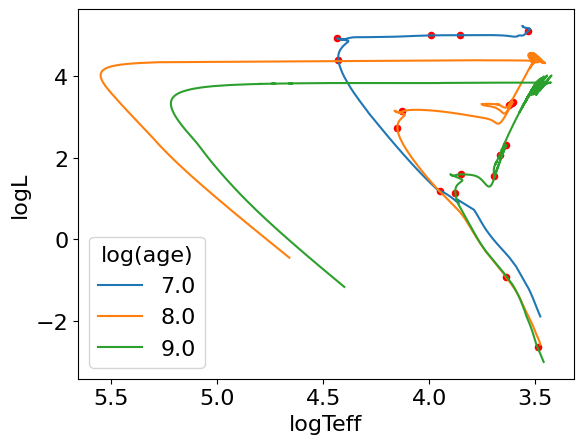

In [7]:
import matplotlib.pyplot as pl

feh0 = 0.0
logAges = [7.0,8.0,9.0]

fig, ax = pl.subplots(dpi=100)

x, y = 'logTeff', 'logL'
for age in logAges:
    iso_df = iso_grid.df.xs((age, feh0), level=(0,1))
    #plot isochrones
    iso_df.plot(x, y, label=f"{age:.1f}", ax=ax)
    #mark EEPs
    eep_indices = iso_df.index.isin(eep_dict.keys())
    #plot EEPs
    iso_df[eep_indices].plot.scatter(x, y, c='r', ax=ax)
    ax.legend(title=f"log(age)")
    ax.invert_xaxis()

In [8]:
import sys

try: 
    import astroquery
except:
    !{sys.executable} -m pip install --upgrade astroquery
    import astroquery

assert astroquery.__version__ == "0.4.6"

In [9]:
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive
import pandas as pd

clobber = False

table_name = "ps" #self-consistent set of parameters
# table_name = "pscomppars" #a more complete, though not necessarily self-consistent set of parameters
fp = f"../data/nexsci_{table_name}.csv"
if clobber:
    nexsci_tab = NasaExoplanetArchive.query_criteria(table=table_name, where="discoverymethod like 'Transit'")
    df_nexsci = nexsci_tab.to_pandas()
    df_nexsci.to_csv(fp, index=False)
    print("Saved: ", fp)
else:
    df_nexsci = pd.read_csv(fp)
    print("Loaded: ", fp)

Loaded:  ../data/nexsci_ps.csv


/tmp/ipykernel_20935/3818164293.py:15: DtypeWarning: Columns (3,4,50,65,148,153,183,206,211,237,242) have mixed types. Specify dtype option on import or set low_memory=False.
  df_nexsci = pd.read_csv(fp)


In [10]:
df_nexsci.shape

(30751, 355)

In [11]:
df_nexsci.query("hostname=='V1298 Tau'")

,pl_name,pl_letter,hostname,hd_name,hip_name,tic_id,gaia_id,default_flag,pl_refname,sy_refname,...,sy_jmagstr,sy_hmag,sy_hmagerr1,sy_hmagerr2,sy_hmagstr,sy_kmag,sy_kmagerr1,sy_kmagerr2,sky_coord.ra,sky_coord.dec
16168,V1298 Tau c,c,V1298 Tau,NaN,NaN,TIC 15756231,Gaia DR2 51886335968692480,1,<a refstr=DAVID_ET_AL__2019 href=https://ui.ad...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,8.687&plusmn;0.023,8.191,0.023,-0.023,8.191&plusmn;0.023,8.094,0.021,-0.021,61.331654,20.157032
16169,V1298 Tau b,b,V1298 Tau,NaN,NaN,TIC 15756231,Gaia DR2 51886335968692480,1,<a refstr=DAVID_ET_AL__2019 href=https://ui.ad...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,8.687&plusmn;0.023,8.191,0.023,-0.023,8.191&plusmn;0.023,8.094,0.021,-0.021,61.331654,20.157032
16170,V1298 Tau e,e,V1298 Tau,NaN,NaN,TIC 15756231,Gaia DR2 51886335968692480,1,<a refstr=DAVID_ET_AL__2019 href=https://ui.ad...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,8.687&plusmn;0.023,8.191,0.023,-0.023,8.191&plusmn;0.023,8.094,0.021,-0.021,61.331654,20.157032
16171,V1298 Tau d,d,V1298 Tau,NaN,NaN,TIC 15756231,Gaia DR2 51886335968692480,1,<a refstr=DAVID_ET_AL__2019 href=https://ui.ad...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,8.687&plusmn;0.023,8.191,0.023,-0.023,8.191&plusmn;0.023,8.094,0.021,-0.021,61.331654,20.157032
29337,V1298 Tau b,b,V1298 Tau,NaN,NaN,TIC 15756231,Gaia DR2 51886335968692480,0,<a refstr=DAVID_ET_AL__2019 href=https://ui.ad...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,8.687&plusmn;0.023,8.191,0.023,-0.023,8.191&plusmn;0.023,8.094,0.021,-0.021,61.331654,20.157032


In [12]:
eep_dict

{1: 'pre-main sequence (PMS)',
 202: 'zero age main sequence (ZAMS)',
 353: 'intermediate age main sequence (IAMS )',
 454: 'terminal age main sequence (TAMS)',
 605: 'tip of the red giant branch (RGBTip)',
 631: 'zero age core helium burning (ZACHeB)',
 707: 'terminal age core helium burning (TACHeB)'}

In [13]:
df_nexsci.disc_facility.unique()

array(['Kepler', 'OGLE', 'SuperWASP-North', 'SuperWASP', 'HATNet', 'KELT',
       'XO', 'HATSouth', 'Multiple Observatories',
       'CHaracterising ExOPlanets Satellite (CHEOPS)', 'KELT-North',
       'SuperWASP-South', 'Transiting Exoplanet Survey Satellite (TESS)',
       'TrES', 'Acton Sky Portal Observatory', 'Qatar',
       'Multiple Facilities', 'KELT-South',
       'United Kingdom Infrared Telescope', 'CoRoT', 'WASP-South', 'K2',
       'Paranal Observatory', 'Anglo-Australian Telescope',
       'MEarth Project', 'SPECULOOS Southern Observatory',
       'Haleakala Observatory', 'Cerro Tololo Inter-American Observatory',
       'La Silla Observatory',
       'European Space Agency (ESA) Gaia Satellite',
       'Hubble Space Telescope'], dtype=object)

In [14]:
def get_relative_err_index(df, par='st_age', rel_err=0.1):
    return df[idx].apply(lambda x: ((x[par+'err1']/x[par]<=rel_err) \
                                    & (x[par+'err2']/x[par]<=rel_err)), 
                                    axis=1)

In [15]:
idx = (df_nexsci.st_age<1) & (df_nexsci.default_flag==1) #& (df_nexsci.disc_facility=='Kepler') 
idx2 = get_relative_err_index(df_nexsci[idx], par='st_age', rel_err=0.2)

df_young = df_nexsci[idx][idx2]
young_hoststar_names = df_young.hostname.unique()
len(young_hoststar_names), young_hoststar_names

/tmp/ipykernel_20935/1502558384.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[idx].apply(lambda x: ((x[par+'err1']/x[par]<=rel_err) \


(21,
 array(['WASP-189', 'Qatar-4', 'Qatar-5', 'Qatar-3', 'HIP 94235',
        'DS Tuc A', 'HD 110082', 'HD 63433', 'K2-100', 'Kepler-1643',
        'Kepler-1928', 'Kepler-411', 'K2-102', 'TOI-2048', 'TOI-1860',
        'K2-25', 'TOI-1227', 'Kepler-970', 'K2-33', 'V1298 Tau',
        'HIP 67522'], dtype=object))

In [16]:
import numpy as np

df_young['logTeff'] = df_young.st_teff.apply(lambda x: np.log10(x))
df_young['logL'] = df_young['st_lum'].copy()

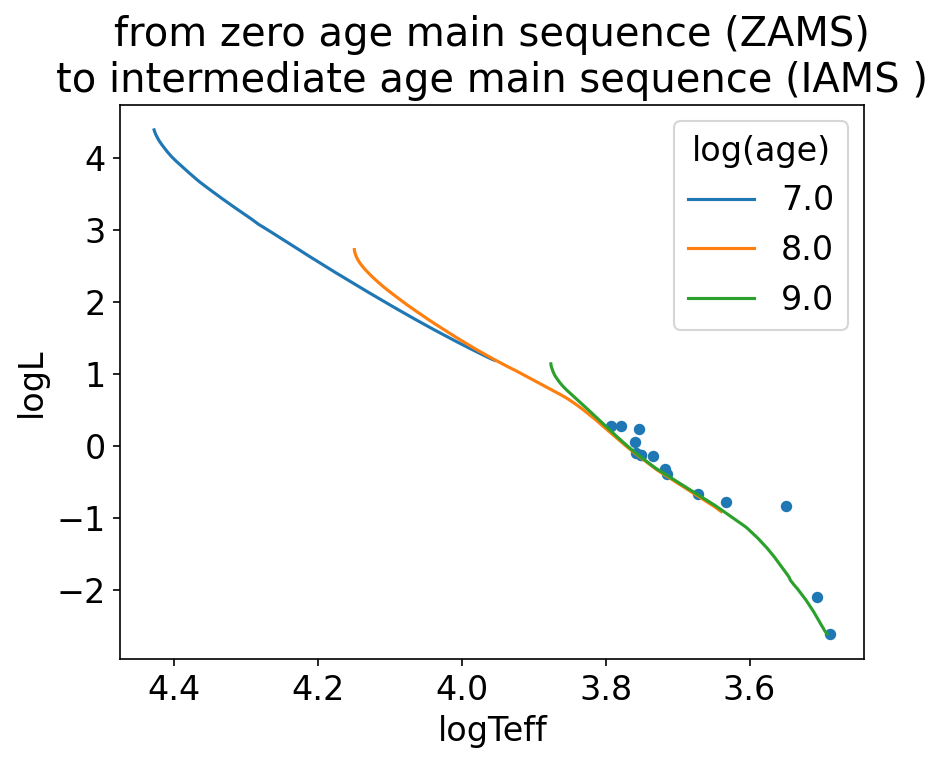

In [17]:
import numpy as np
import matplotlib.pyplot as pl

def plot_iso_grid(x='logTeff', y='logL', 
                eep1=202, eep2=353, 
                logAges=[7.0,8.0,9.0],
                feh0 = 0.0,
                ax=None):
    if ax is None:
        fig, ax = pl.subplots(dpi=150)

    stage_start = eep_dict[eep1]
    stage_end = eep_dict[eep2]

    for age in logAges:
        iso_df = iso_grid.df.xs((age, feh0), level=(0,1))
        iso_df_eeps = np.array(iso_df.index.tolist())
        idx = (iso_df_eeps>eep1) & (iso_df_eeps<=eep2)
        iso_df[idx].plot(x, y, label=f"{age:.1f}", ax=ax)
        ax.set_ylabel(y)
        ax.set_title(f"from {stage_start}\nto {stage_end}")
        ax.legend(title="log(age)")
        if x=='logTeff':
            ax.invert_xaxis()
    return ax

def plot_planets(df,
                x='logTeff', y='logL', 
                ax=None):
    if ax is None:
        fig, ax = pl.subplots(dpi=150)
    df.plot.scatter(x=x, y=y, ax=ax)
    return ax
    
ax = plot_iso_grid()

_ = plot_planets(df_young, ax=ax)

(0.0, 3.0)

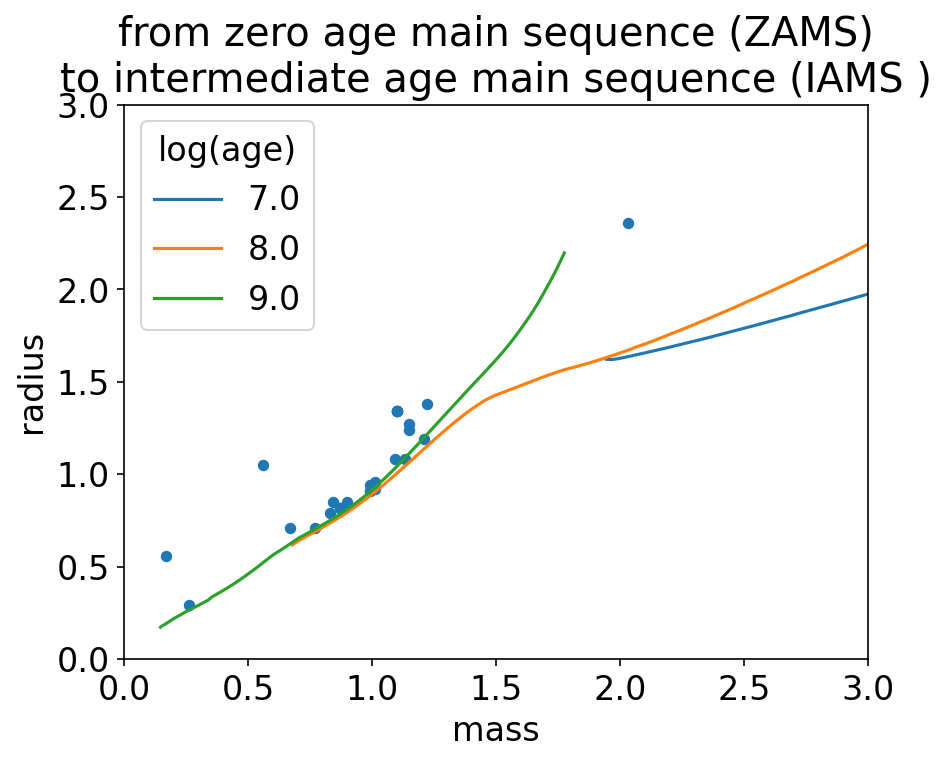

In [18]:
df_young['mass'] = df_young['st_mass'].copy()
df_young['radius'] = df_young['st_rad'].copy()

x, y = 'mass', 'radius'

ax = plot_iso_grid(x=x, y=y)

_ = plot_planets(df_young, x=x, y=y, ax=ax)
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)

(0.0, 3.0)

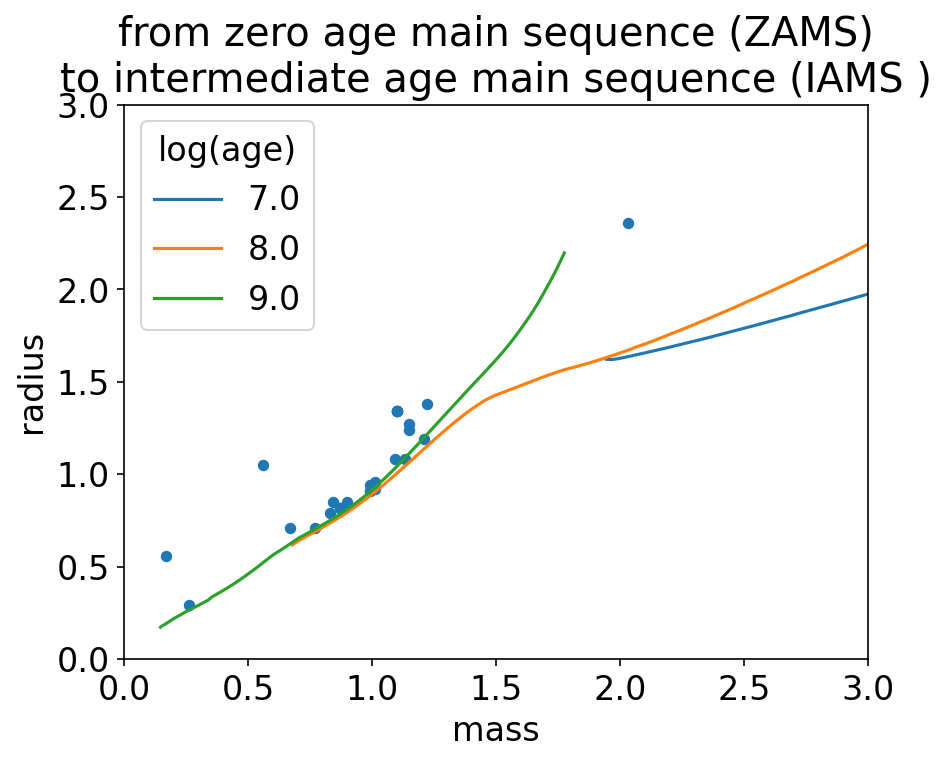

In [20]:
df_young['mass'] = df_young['st_mass'].copy()
df_young['radius'] = df_young['st_rad'].copy()

x, y = 'mass', 'radius'

ax = plot_iso_grid(x=x, y=y)

_ = plot_planets(df_young, x=x, y=y, ax=ax)
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)